# 第4週：對ptt股票版「00940」進行情緒分析
**Author:** 李培聖<br>
**Date created:** 2024/01/26<br>
**Last modified:** 2024/03/23<br>
本週課程為「情緒分析1」，目的為了解lexicon-base 情緒分析。情緒分析步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中，我們將會介紹所使用到的套件、資料前處理、lexicon-base 情緒分析

## 大綱
+ 1. 套件說明
+ 2. 資料前處理
    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 文章斷詞
+ 3. lexicon-base 情緒分析
    + 3.1 準備LIWC情緒字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負向情緒詞彙頻率折線圖圖
    + 3.4 正負向情緒詞彙比例折線圖圖
    + 3.5 正負向情緒分數折線圖圖
    + 3.6 文章為單位的情緒分析
    + 3.7 情緒代表字
    + 3.8 文字雲

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- matplotlib: 繪圖工具。
- wordcloud: 繪製文字雲工具。
- jieba: 中文斷詞工具。

## 本機使用套間
請先於環境中使用 pip install

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud 
import jieba
%matplotlib inline

## colab 使用套件

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install wordcloud
# !pip install jieba

In [105]:
# plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="./SourceHanSansTW-Regular.otf")
FontPath = './SourceHanSansTW-Regular.otf'


# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

## 2. 資料前處理
如 week3 所示  
使用「00940」作為關鍵字，從工作流程系統中將 ptt 資料下載下來

### 2.1 基本資料介紹
- 資料來源: 工作流程蒐集PTT 股票版 Food 2024-01-26 ~ 2024-03-23 所有文章

In [3]:
df = pd.read_csv("./00940.csv")
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date 
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,MikeShiver,Stock,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""abc0922001"",...",180.217.136.24,2024-01-27 02:04:03,ptt
1,2,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,[新聞]元大加入月配息ETF戰場！00940發行價10,2024-01-27,kiversonx17,Stock,原文標題：\n\n元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""SuGK"", ""cmtC...",118.165.210.174,2024-01-28 02:04:10,ptt
2,3,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,[請益]00940的選股邏輯,2024-02-18,humbler,Stock,元大新募集的高股息ETF 00940，\n除了發行價10元驚人低之外，\n選股邏輯納入本益比...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""apeople"", ""c...",111.251.198.167,2024-02-19 02:05:29,ptt
3,4,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,[標的]2603長榮高股息送錢多多多,2024-02-19,kindred2348,Stock,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""vvnews"", ""cm...",125.230.92.22,2024-02-20 02:09:34,ptt
4,5,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,Re:[標的]2603長榮高股息送錢多多多,2024-02-21,kindred2348,Stock,https://i.imgur.com/O71Mm0G.jpg\n本來打算$147買長榮 結...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""Cheng0810"", ...",27.53.232.122,2024-02-22 02:19:27,ptt


### 2.2資料清理

In [4]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文標題：元大臺灣價值高息ETF准募 3／11展開募集。原文連結： 17:54。記者署名：...
1,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,[新聞]元大加入月配息ETF戰場！00940發行價10,2024-01-27,原文標題：\n\n元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號...,原文標題：。元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號募集。...
2,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,[請益]00940的選股邏輯,2024-02-18,元大新募集的高股息ETF 00940，\n除了發行價10元驚人低之外，\n選股邏輯納入本益比...,元大新募集的高股息ETF 00940，除了發行價10元驚人低之外，選股邏輯納入本益比、自由現...
3,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,[標的]2603長榮高股息送錢多多多,2024-02-19,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,1. 標的：2603長榮。2. 分類：多。3. 分析/正文：紅海至少再亂個幾個月沒問題 這也...
4,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,Re:[標的]2603長榮高股息送錢多多多,2024-02-21,https://i.imgur.com/O71Mm0G.jpg\n本來打算$147買長榮 結...,結果發文完..隔天不回頭開始起漲。只買到$152的長榮 真的哭暈在船上。以下是長榮 操作非...
...,...,...,...,...,...
236,https://www.ptt.cc/bbs/Stock/M.1711114451.A.F8...,Re:[新聞]羅瑋：升息半碼「很難」控制通膨市場預,2024-03-22,帶\n。\n人\n驚\n先講結論，台央不可能再升息了。\n\n很多人說這次升息是為了壓通膨，...,帶。人驚先講結論，台央不可能再升息了。。很多人說這次升息是為了壓通膨，但從政府馬上補貼貸款的...
237,https://www.ptt.cc/bbs/Stock/M.1711117860.A.1A...,Re:[新聞]羅瑋：升息半碼「很難」控制通膨市場預,2024-03-22,不要手上有槌子什麼都是釘子\n\n沒有哪國的央行在看股市決定要不要升息降息的啦\n\n央行看...,不要手上有槌子什麼都是釘子。沒有哪國的央行在看股市決定要不要升息降息的啦。央行看得是通膨 只...
238,https://www.ptt.cc/bbs/Stock/M.1711119012.A.D2...,[新聞]00940淨值首度跌破10元申購價 剩9.97元,2024-03-22,原文標題：\n快訊／00940淨值首度跌破10元申購價 剩9.97元\n\n原文連結：\nh...,原文標題：快訊／00940淨值首度跌破10元申購價 剩9.97元。原文連結：
239,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。。但仍然不死...


斷句

In [5]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文標題：元大臺灣價值高息ETF准募 3／11展開募集
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文連結： 17:54
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,記者署名：工商時報 陳昱光
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文內容：
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大投信26日取得證交所同意募集元大臺灣價值高息ETF證券投資信託基金（00940）
...,...,...,...,...,...
6254,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,希望下周能吃到豆腐
6255,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,
6256,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,標的：00940成分股分類：
6257,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,討論


In [6]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt

jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')
# jieba.add_word('自助餐')
# jieba.add_word('韓式料理')
# jieba.add_word('漢神巨蛋')

Building prefix dict from c:\Users\USER\Desktop\final_scribble\group\dict\dict.txt ...
Dumping model to file cache C:\Users\USER\AppData\Local\Temp\jieba.ucbdd62350c58a5eb35a161953f4a064d.cache
Loading model cost 0.546 seconds.
Prefix dict has been built successfully.


In [7]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文標題元大臺灣價值高息ETF准募 311展開募集
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文連結 1754
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,記者署名工商時報 陳昱光
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文內容
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大投信26日取得證交所同意募集元大臺灣價值高息ETF證券投資信託基金00940
...,...,...,...,...,...
6253,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,如果漲二天就賣掉
6254,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,希望下周能吃到豆腐
6256,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,標的00940成分股分類
6257,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,討論


### 2.3 文章斷詞

In [8]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,標題
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,臺灣
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,價值
...,...,...,...,...,...
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,from
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,JPTT
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,on
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,my


移除停用字

In [133]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 
stopwords_manual = ["00940", "ETF", "940", "現在", "今天", "原文", "10", "15", "今年", "一下", "目前"]
stopwords.extend(stopwords_manual)

In [134]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,標題
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,臺灣
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,價值
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,高息
...,...,...,...,...,...
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,from
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,JPTT
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,on
6258,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,[標的]00940.TW元大台灣價值成分股,2024-03-23,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,my


### 4.5 計算去除停用字及更新字典前的詞頻

In [135]:
freq_df = pd.DataFrame(pd.value_counts(noStop_df['word'])).reset_index()
freq_df.head(10)

,index,word
0,元大,249
1,申購,228
2,股息,222
3,台灣,188
4,投資,175
5,投信,158
6,高息,154
7,市場,147
8,配息,142
9,長榮,141


### 4.6 視覺化結果

matplotlib 畫圖中文顯示不出來的問題

* Mac : <a href="https://blog.csdn.net/RivenDong/article/details/118990773">參考方式</a>
* Windows : <a href="https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b">參考方式</a>
* 暫存查找 path 方式：matplotlib.get_cachedir()

#### 繪製詞頻為前10高的長條圖

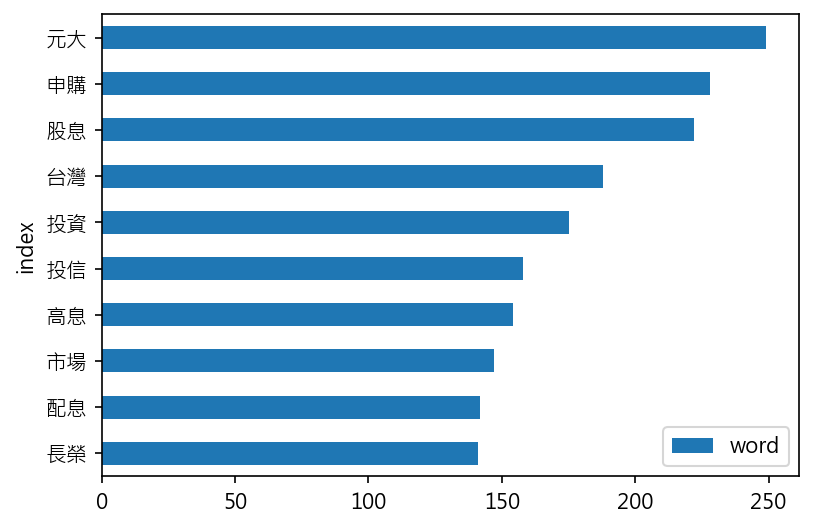

In [136]:
freq_df.head(10).plot.barh(x = 'index', y = 'word').invert_yaxis()
plt.show()

#### 繪製文字雲

In [137]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('index').to_dict()
freq_dict = freq_dict['word']

freq_dict

{'元大': 249,
 '申購': 228,
 '股息': 222,
 '台灣': 188,
 '投資': 175,
 '投信': 158,
 '高息': 154,
 '市場': 147,
 '配息': 142,
 '長榮': 141,
 '募集': 137,
 '投資人': 133,
 '成分股': 133,
 '台股': 122,
 '價值': 119,
 '資金': 112,
 '記者': 90,
 '證券': 88,
 '標題': 88,
 '億元': 86,
 '規模': 85,
 '上市': 83,
 '淨值': 83,
 '00939': 81,
 '股價': 80,
 '股票': 79,
 '心得': 76,
 '金額': 75,
 '00919': 72,
 '連結': 71,
 '銀行': 70,
 '內容': 69,
 '基金': 66,
 '公司': 64,
 '定存': 63,
 '超過': 62,
 '標的': 62,
 '指數': 61,
 '統一': 61,
 '評論': 61,
 '進場': 57,
 '金管會': 56,
 '署名': 56,
 '長期': 56,
 '動能': 54,
 '掛牌': 52,
 '知道': 52,
 '風險': 51,
 '股利': 49,
 '表示': 49,
 '臺灣': 49,
 '現金': 49,
 '指出': 49,
 '殖利率': 47,
 '未來': 47,
 'my': 45,
 '買進': 44,
 '看到': 43,
 '股市': 42,
 '11': 42,
 '持續': 42,
 '發行': 42,
 '機會': 42,
 '價格': 41,
 '券商': 41,
 '討論': 40,
 '平準': 40,
 '大盤': 40,
 '20': 39,
 '溢價': 39,
 '影響': 39,
 '時間': 39,
 '聯發科': 39,
 '開戶': 38,
 '直接': 38,
 '散戶': 38,
 '產品': 38,
 '問題': 37,
 '豆腐': 37,
 '公告': 36,
 '認為': 36,
 '神基': 35,
 'from': 35,
 '群光': 35,
 '最後': 35,
 '分析': 35,
 'on': 35,
 '民眾': 34,
 '十

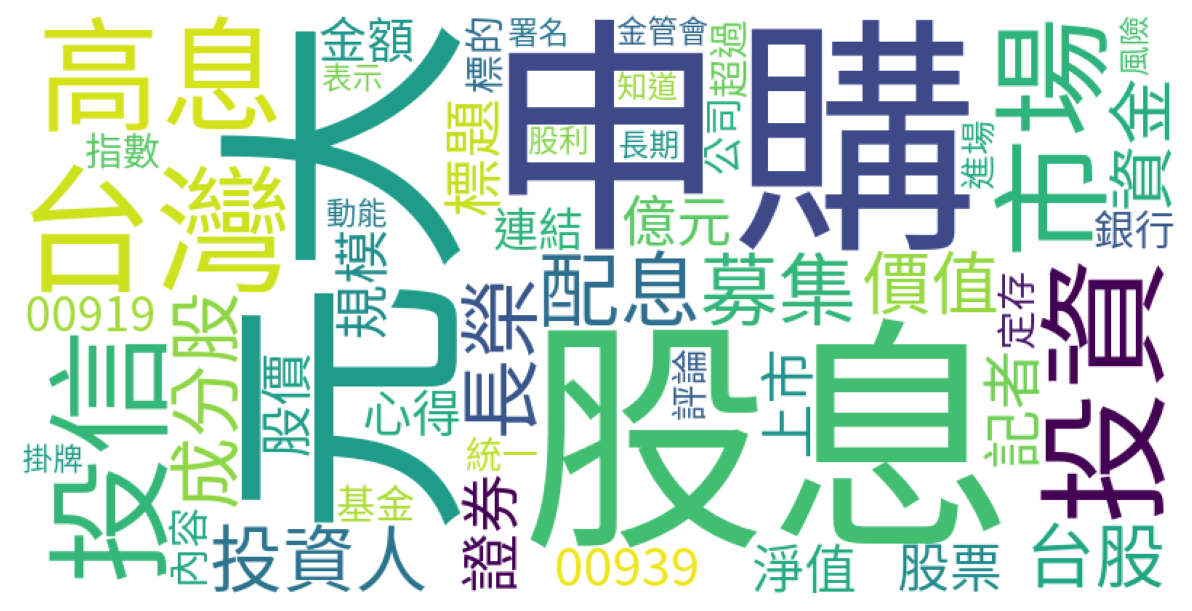

In [138]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Lexicon-based 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
>  就英文版的LIWC2007來說，目前包含了64個定義類別。這些類別包括基本的語文向度類別，例如： 22個語文特性類別（如，代名詞、冠詞等百分比）、3個副語言學（paralinguistic）類別（如應和詞、停頓詞等）。除了已經有具有明確定義的語文類別之外，LIWC也另外包含了32個心理特性類別（如，情感詞、認知詞等）、7個個人化類別（如工作、休閒活動等）。再加上程式自動計算出的6個一般描述性類別（總詞數、每句詞數等）以及12個標點符號類別（如句點、逗點等），總計可輸出80個字詞類別。
- https://cliwc.weebly.com/liwc20073542220856.html 
- https://cliwc.weebly.com/35422208563900621029200131228933521259913549826126.html

In [139]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [140]:
liwc_dict['sentiments'].describe()

count       4682
unique         6
top       affect
freq        2061
Name: sentiments, dtype: object

### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。

```merge function 介紹```
https://www.delftstack.com/zh-tw/howto/python-pandas/merge-dataframes-on-index-in-pandas/

In [141]:
ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,標題,NaN
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大,NaN
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,臺灣,NaN
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,價值,NaN
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,高息,NaN
...,...,...,...,...,...,...
27646,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,2024-03-23,[標的]00940.TW元大台灣價值成分股,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,from,NaN
27647,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,2024-03-23,[標的]00940.TW元大台灣價值成分股,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,JPTT,NaN
27648,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,2024-03-23,[標的]00940.TW元大台灣價值成分股,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,on,NaN
27649,https://www.ptt.cc/bbs/Stock/M.1711127144.A.3C...,2024-03-23,[標的]00940.TW元大台灣價值成分股,標的：\n00940成分股\n分類：\n\n討論\n\n分析/正文：\nGoogle 009...,my,NaN


### 3.3 正負向情緒詞彙頻率折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

```情緒分析指標```
在情緒分析中，我們會以不同的指標來看情緒的好壞，其中常見的包含：
1. **情感詞彙頻率**： 使用情感詞彙列表，其中包含正向和負向情感的詞彙。將文本中的詞與該列表進行匹配，計算正向和負向詞彙的出現次數，從而判斷整體情感傾向。
2. **情感詞彙比例**：不同於單純的計算頻率，比例是某種情緒（例如：正向）佔所有情緒詞中的幾分之幾。這種方法可以避免某一天文章數特別多（詞頻也會隨之變多）而影響情緒的判斷。
2. **情感詞彙分數**： 給每個情感詞彙分配一個權重或分數，然後計算文本中所有情感詞的總分。這種方法允許區分不同情感詞的影響力，進一步細化情感分析的結果。

我們先以最基本的詞頻來計算

```groupby function 介紹```https://zhuanlan.zhihu.com/p/101284491

In [142]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
2,2024-01-26,negative,2
3,2024-01-26,positive,5
6,2024-01-27,negative,2
7,2024-01-27,positive,5
9,2024-02-18,negative,2
10,2024-02-18,positive,4
12,2024-02-19,negative,1
13,2024-02-19,positive,1
16,2024-02-21,negative,2
17,2024-02-21,positive,9


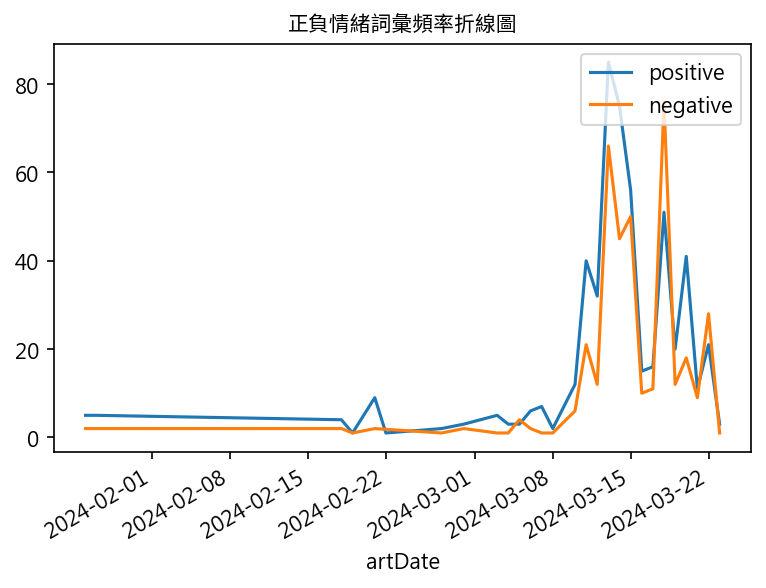

In [143]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

```Moving average```
- rolling average（滾動平均）是一種將時間序列數據平滑化的技術，有助於去除數據中的噪聲，使趨勢更加明顯，同時仍然保留一定的時間特徵。
- 在情緒分析中，特別是當你有一系列時間序列的情緒數據時，使用滾動平均有助於平滑數據，使情緒趨勢更加清晰。
    1. **去除瞬間噪聲**： 情緒數據可能受到瞬間事件或噪聲的影響，例如突發的大量評論或新聞。滾動平均有助於平滑這些突變，使你更容易觀察到整體趨勢。
    2. **強調長期趨勢**： 滾動平均有助於強調長期情緒趨勢，而不受短期波動的干擾。這對於觀察情緒的漸變和長期變化非常有用。


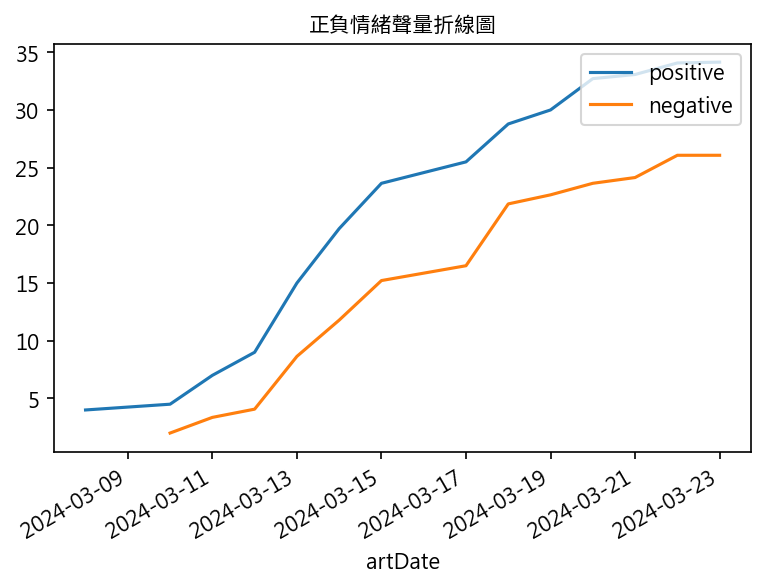

In [144]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒聲量折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

畫出每天的情緒總分數，可以看到正面的詞出現頻率幾乎每天都超過負面，是個氣氛和諧的討論版。

```詞頻缺點```

如果某一天有什麼事件發生而導致正負向詞頻數隨之飆高，在趨勢圖看來可能會認為該區間的正負向情緒較為顯著，但也有可能是因為總體情緒詞彙本來就比較多而導致的。

以比例的方式來看，我們可以觀察到某個情緒詞在總體情緒詞彙中所佔的比例，就算某一天文章數相較多，也不會影響到比例的呈現。

### 3.4 正負向情緒詞彙比例折線圖圖

```lambda```函式是一種匿名函式，包含以下幾點特性：

+ 不需要定義函式名稱
+ 只能有一行運算式
+ 執行完後會自動回傳結果，不需要return   

因此```lambda```適合在該函式只有單行運算式且不會被重複呼叫時使用

參考網址：   
[Python Lambda](https://www.w3schools.com/python/python_lambda.asp)   
[Lambda — Python 重要語法技巧](https://medium.com/johnliu-的軟體工程思維/lambda-python-重要語法技巧-27c467ddfa16)

In [145]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
2,2024-01-26,negative,2,0.285714
3,2024-01-26,positive,5,0.714286
6,2024-01-27,negative,2,0.285714
7,2024-01-27,positive,5,0.714286
9,2024-02-18,negative,2,0.333333
10,2024-02-18,positive,4,0.666667
12,2024-02-19,negative,1,0.500000
13,2024-02-19,positive,1,0.500000
16,2024-02-21,negative,2,0.181818
17,2024-02-21,positive,9,0.818182


In [146]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

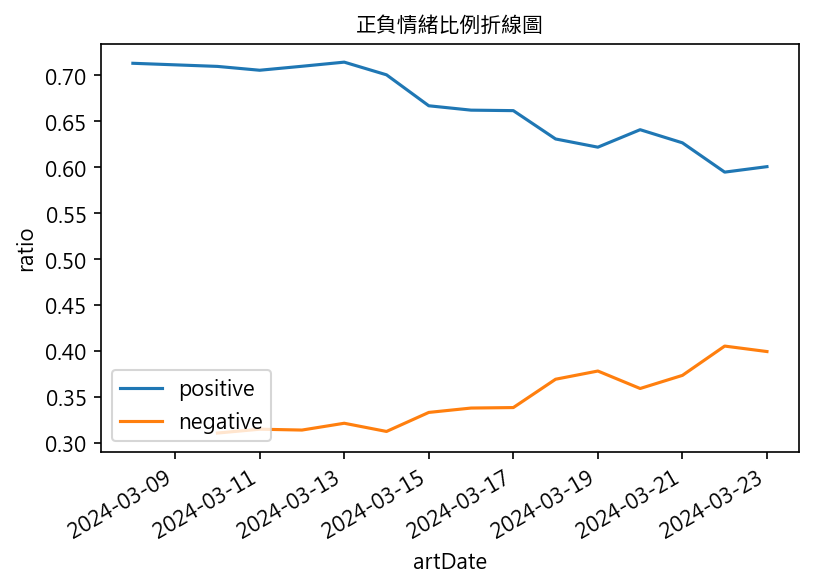

In [147]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

### 3.5 正負向情緒分數折線圖

In [149]:
sentiment_count

,artDate,sentiments,size,ratio
2,2024-01-26,negative,2,0.285714
3,2024-01-26,positive,5,0.714286
6,2024-01-27,negative,2,0.285714
7,2024-01-27,positive,5,0.714286
9,2024-02-18,negative,2,0.333333
10,2024-02-18,positive,4,0.666667
12,2024-02-19,negative,1,0.500000
13,2024-02-19,positive,1,0.500000
16,2024-02-21,negative,2,0.181818
17,2024-02-21,positive,9,0.818182


In [150]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,negative,positive
0,2024-01-26,2,5
1,2024-01-27,2,5
2,2024-02-18,2,4
3,2024-02-19,1,1
4,2024-02-21,2,9


In [151]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

,artDate,negative,positive,sentiment_value
0,2024-01-26,2,5,3
1,2024-01-27,2,5,3
2,2024-02-18,2,4,2
3,2024-02-19,1,1,0
4,2024-02-21,2,9,7


Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

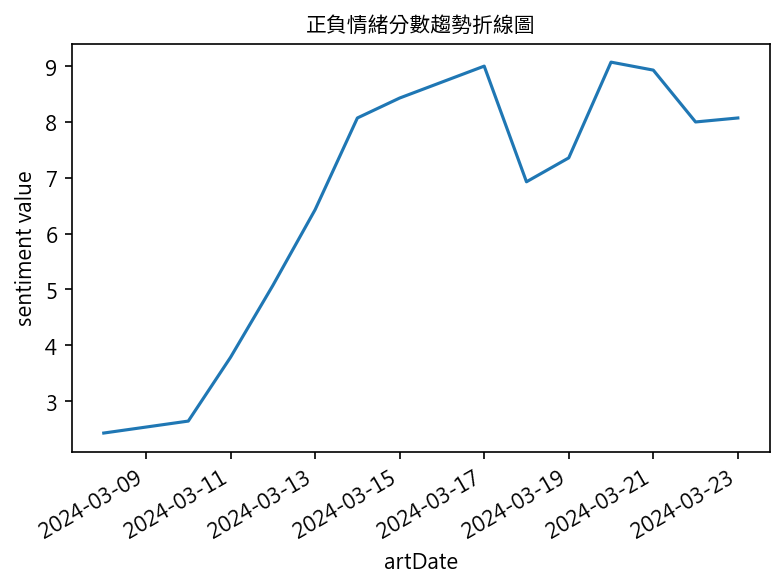

In [152]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 3.6 文章為單位的情緒分析

In [153]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article

,artUrl,sentiments,size
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,affect,8
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,anx,2
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,negative,2
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,positive,5
4,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,affect,8
...,...,...,...
601,https://www.ptt.cc/bbs/Stock/M.1711117860.A.1A...,negative,1
602,https://www.ptt.cc/bbs/Stock/M.1711117860.A.1A...,positive,3
603,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,affect,4
604,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,negative,1


In [154]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,8,0,2,2,5,0
1,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,8,0,2,2,5,0
2,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,4,0,0,2,4,0
3,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2,0,0,1,1,0
4,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,11,1,0,2,9,1


In [156]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,8,0,2,2,5,0,3
1,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,8,0,2,2,5,0,3
2,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,4,0,0,2,4,0,2
3,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2,0,0,1,1,0,0
4,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,11,1,0,2,9,1,7


In [157]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value,sentiment_class
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,8,0,2,2,5,0,3,正向
1,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,8,0,2,2,5,0,3,正向
2,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,4,0,0,2,4,0,2,正向
3,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2,0,0,1,1,0,0,負向
4,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,11,1,0,2,9,1,7,正向
...,...,...,...,...,...,...,...,...,...
173,https://www.ptt.cc/bbs/Stock/M.1711103348.A.C7...,6,0,0,3,3,0,0,負向
174,https://www.ptt.cc/bbs/Stock/M.1711106803.A.EC...,3,0,0,2,1,1,-1,負向
175,https://www.ptt.cc/bbs/Stock/M.1711114451.A.F8...,4,1,0,1,3,0,2,正向
176,https://www.ptt.cc/bbs/Stock/M.1711117860.A.1A...,4,0,1,1,3,0,2,正向


In [158]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date
clear_df_sentiment

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,sentiment_class
0,1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,MikeShiver,Stock,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""abc0922001"",...",180.217.136.24,2024-01-27 02:04:03,ptt,正向
1,2,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,[新聞]元大加入月配息ETF戰場！00940發行價10,2024-01-27,kiversonx17,Stock,原文標題：\n\n元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""SuGK"", ""cmtC...",118.165.210.174,2024-01-28 02:04:10,ptt,正向
2,3,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,[請益]00940的選股邏輯,2024-02-18,humbler,Stock,元大新募集的高股息ETF 00940，\n除了發行價10元驚人低之外，\n選股邏輯納入本益比...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""apeople"", ""c...",111.251.198.167,2024-02-19 02:05:29,ptt,正向
3,4,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,[標的]2603長榮高股息送錢多多多,2024-02-19,kindred2348,Stock,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""vvnews"", ""cm...",125.230.92.22,2024-02-20 02:09:34,ptt,負向
4,5,https://www.ptt.cc/bbs/Stock/M.1708525683.A.83...,Re:[標的]2603長榮高股息送錢多多多,2024-02-21,kindred2348,Stock,https://i.imgur.com/O71Mm0G.jpg\n本來打算$147買長榮 結...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""Cheng0810"", ...",27.53.232.122,2024-02-22 02:19:27,ptt,正向
...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,https://www.ptt.cc/bbs/Stock/M.1711114451.A.F8...,Re:[新聞]羅瑋：升息半碼「很難」控制通膨市場預,2024-03-22,JessVeron,Stock,帶\n。\n人\n驚\n先講結論，台央不可能再升息了。\n\n很多人說這次升息是為了壓通膨，...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""tamama000"", ...",42.77.69.193,2024-03-23 02:07:14,ptt,正向
237,238,https://www.ptt.cc/bbs/Stock/M.1711117860.A.1A...,Re:[新聞]羅瑋：升息半碼「很難」控制通膨市場預,2024-03-22,wen17,Stock,不要手上有槌子什麼都是釘子\n\n沒有哪國的央行在看股市決定要不要升息降息的啦\n\n央行看...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""bnn"", ""cmtCo...",31.205.109.42,2024-03-23 02:07:14,ptt,正向
238,239,https://www.ptt.cc/bbs/Stock/M.1711119012.A.D2...,[新聞]00940淨值首度跌破10元申購價 剩9.97元,2024-03-22,pttmans,Stock,原文標題：\n快訊／00940淨值首度跌破10元申購價 剩9.97元\n\n原文連結：\nh...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""gtaped05550""...",59.126.192.175,2024-03-23 02:07:14,ptt,NaN
239,240,https://www.ptt.cc/bbs/Stock/M.1711125137.A.6C...,Re:[標的]00940及成份股,2024-03-23,Ligamenta,Stock,前文樹珊，簡單總結一下。除了第一天中美晶，神基吃到香香豆，剩下三天全是臭酸豆腐。\n\n但仍...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""s56565566123...",220.132.230.8,2024-03-23 02:07:18,ptt,正向


In [159]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

,artDate,sentiment_class,size
0,2024-01-26,正向,1
1,2024-01-27,正向,1
2,2024-02-18,正向,1
3,2024-02-19,負向,1
4,2024-02-21,正向,1
5,2024-02-22,正向,1
6,2024-02-27,正向,1
7,2024-02-29,正向,1
8,2024-02-29,負向,1
9,2024-03-03,正向,1


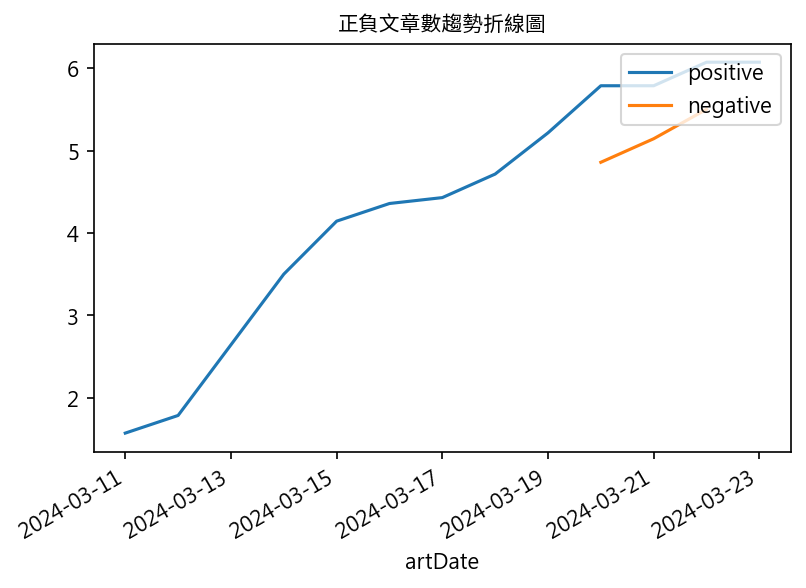

In [160]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

大部分文章都被歸類在正向文章，美食版討論內容大多偏正面

### 3.7 情緒代表字

In [161]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
610,風險,negative,51
609,風險,anx,51
608,風險,affect,51
143,問題,negative,37
142,問題,affect,37
...,...,...,...
287,打擊,affect,1
284,懷疑,negative,1
283,懷疑,anx,1
282,懷疑,affect,1


In [162]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(15)

,word,sentiments,size
141,吸引,positive,21
310,投入,positive,18
286,成功,positive,18
77,分享,positive,16
376,朋友,positive,16
508,自由,positive,15
578,重要,positive,14
61,優勢,positive,13
41,保證,positive,12
207,容易,positive,12


In [163]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(15)

,word,sentiments,size
610,風險,negative,51
143,問題,negative,37
592,降低,negative,15
332,擔心,negative,12
472,瘋狂,negative,11
619,驚人,negative,10
537,詐騙,negative,9
326,損失,negative,8
550,變動,negative,8
297,扭曲,negative,7


c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0.5, 1.0, '負向情緒總數')

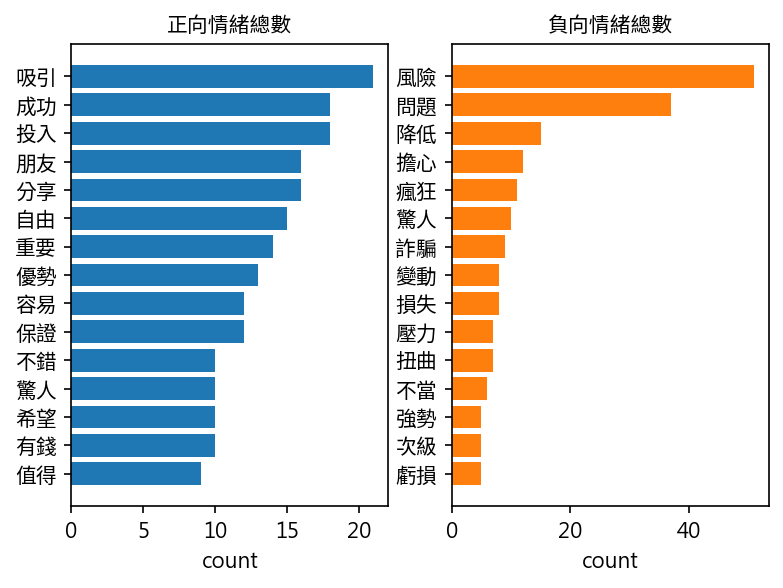

In [164]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

#### 檢查情緒詞是否符合本文本

In [165]:
filtered_df = sent_df[sent_df['sentence'].str.contains('風險', na=False)]
filtered_df.head()

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
309,https://www.ptt.cc/bbs/Stock/M.1709452598.A.9C...,[新聞]台股ETF高息10％成絕響？金管會祭新3誡,2024-03-03,原文標題：台股ETF高息10％成絕響？金管會祭新3誡 存股當心！6檔平準金占比逾1成\n\n...,並需在官網揭示委外計算的特定風險等相關警語,正向
481,https://www.ptt.cc/bbs/Stock/M.1709727528.A.03...,[標的]即將掛牌的00940.TW值得長期投資嗎,2024-03-06,-\n1.發標的文未充實內文，\n多空理由不充實\n者，板規1-1-5或4-4處份\n2.進...,它的風險值被評價為RR4,正向
482,https://www.ptt.cc/bbs/Stock/M.1709727528.A.03...,[標的]即將掛牌的00940.TW值得長期投資嗎,2024-03-06,-\n1.發標的文未充實內文，\n多空理由不充實\n者，板規1-1-5或4-4處份\n2.進...,接近最高風險,正向
619,https://www.ptt.cc/bbs/Stock/M.1710054246.A.1D...,[新聞]存600張月領逾4萬 「00940」受青睞爆預,2024-03-10,-\n\n原文標題：存600張月領逾4萬 「00940」受青睞爆預購人潮\n原文連結：\nh...,能適度分散產業風險,正向
1314,https://www.ptt.cc/bbs/Stock/M.1710256506.A.B1...,[新聞]00940破紀錄！再灌978億進場 兩天申購飆,2024-03-12,原文標題：00940破紀錄！再灌978億進場 兩天申購飆破1700億\n\n\n原文連結：\...,基金投資皆有風險,正向


In [166]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

並需在官網揭示委外計算的特定風險等相關警語
它的風險值被評價為RR4
接近最高風險
能適度分散產業風險
基金投資皆有風險
要檢視風險屬性持有適合自己的資產
加上不像外幣定存有匯率風險
元大投信罕見發聲　注意風險承受能力原文連結 084500記者署名記者陳瑩欣台北報導原文內容
但也呼籲投資人要注意風險承受能力
評估自身風險承受能力
分散個股風險並參與台股長期成長
並強調基金投資具有波動風險
理性評估自身風險承受能力
心得評論哇竟然募到券商出來提醒風險太扯了吧為什麼940臺灣價值高股息這次那麼熱阿小兒有想過臺灣人錢淹腳目嗎
評估自身風險承受能力
仍需進行風險承受度審核
那一些個股聚集起來  風險一樣存在呀
提醒投資人充分了解產品特性評估風險承受能力
也存在著某些風險
是否存在風險
投資都會有風險
存在那些風險
ETF的風險
評估自身風險承受能力
分散個股風險並參與台股長期成長
雖然台股近2萬點也有可能折價風險
ETF還是有風險
評估自身風險承受能力
是機會也有風險
然而大家對各式各樣的風險還是不得不防
而年輕人的承受風險能力較高
高風險伴隨高獲利
  靠風險較高的投資組合時間
0050風險更高 報酬更高
0056風險低一些 報酬低一些
還有歸0的壁紙風險好基金經理人幫你保管讓你不用選時機自己抽差股票
年輕人領56 ETF就是沒出息 都給我去更高風險的地方抽差股票
高風險左手換右手羊毛出在羊身上投資人拿到錢會亂花
風險很大尤其你的隊友還幾乎都是散戶
直接壓縮在上市前這一期把正常該緩步進行的風險通通省略
你要爬一座山途中需要水壺甜食體力也有途中未知的失足風險但你現在想要找個未來人用魔法把自己直接變到山頂上去再來慢慢消化途中的損耗跟風險
那問題來了萬一這些途中的風險有不可承受的情況呢你突然眼殘撞到瑪莎拉蒂
股票投資有風險 申購前請詳閱公開說明書
否則拉越長風險越高這邊講的是短期波動會卡越久
降低高擋買股票的風險
傷害聯發科未來幾季的報酬風險比
未來可能將面臨Android客戶採購放緩的風險
而風險偏好指數
風險偏好指數從211再上升至247 
00940具備分散風險定期調整持股等有利ETF存股投資特性
元大投信在ETF的發行操作與風險控管經驗領先市場
投資前應謹慎評估ETF具有價格波動風險
否則波動風險太大長榮殷鑑不遠看這波ETF大媽買盤有沒有持續增長
但想說可以再加一檔月配

#### 重新計算情緒

'瘋狂','虧損','次級','強勢','扭曲','壓力','變動','詐騙','驚人','降低','邪惡','禁止'

In [167]:
# 設定要移除的字詞列表
words_to_remove = ['瘋狂','虧損','次級','強勢','扭曲','壓力','變動','詐騙','驚人','降低','邪惡','禁止']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,標題,NaN
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大,NaN
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,臺灣,NaN
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,價值,NaN
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,高息,NaN


c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, '負向情緒總數')

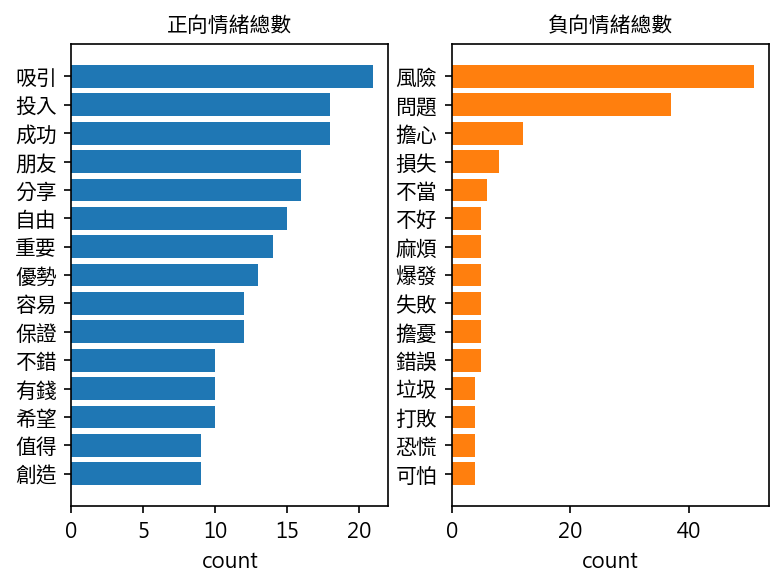

In [168]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

重新繪製情緒分數趨勢圖

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

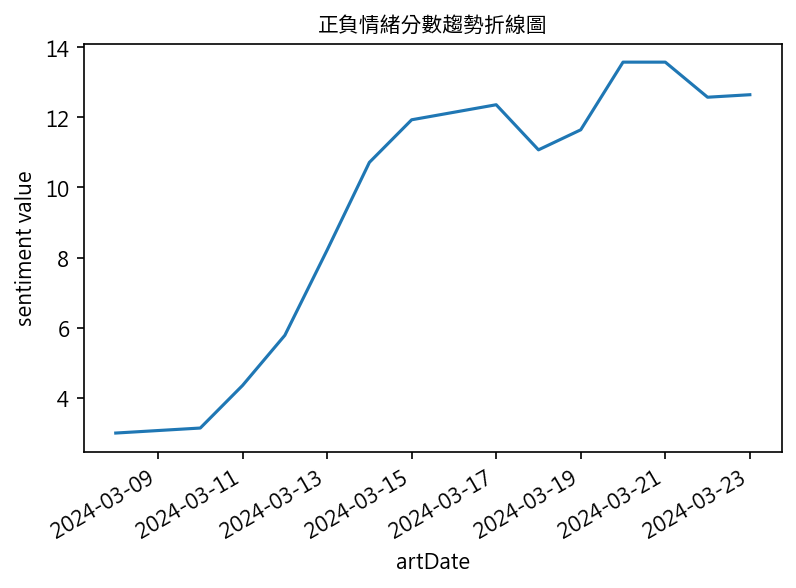

In [169]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative") 
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 3.8 文字雲
如果文字雲中的字詞大小越大，代表出現頻率越高

#### 2024-01-26 ~2024-03-23 文字雲
2024-01-26 ~2024-03-23 在情緒分數趨勢圖上顯示比較低的分數，我們用文字雲來看一下這段時間出現了什麼關鍵字

將前面計算出的文章情緒類別合併，以利我們過濾出負面文章資料

In [170]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,標題,NaN,正向
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大,NaN,正向
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,臺灣,NaN,正向
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,價值,NaN,正向
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,2024-01-26,[新聞]元大臺灣價值高息ETF准募3／11展開募集,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,高息,NaN,正向


In [171]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
0,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文標題元大臺灣價值高息ETF准募 311展開募集,正向
1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文連結 1754,正向
2,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,記者署名工商時報 陳昱光,正向
3,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,原文內容,正向
4,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,元大投信26日取得證交所同意募集元大臺灣價值高息ETF證券投資信託基金00940,正向


In [172]:
date = "2024-01-26"
end_date = "2024-03-23"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
712,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2024-02-19,[標的]2603長榮高股息送錢多多多,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,標的,NaN,負向
713,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2024-02-19,[標的]2603長榮高股息送錢多多多,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,2603,NaN,負向
714,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2024-02-19,[標的]2603長榮高股息送錢多多多,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,長榮,NaN,負向
715,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2024-02-19,[標的]2603長榮高股息送錢多多多,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,分類,NaN,負向
716,https://www.ptt.cc/bbs/Stock/M.1708346252.A.29...,2024-02-19,[標的]2603長榮高股息送錢多多多,1. 標的：2603長榮\n\n2. 分類：多\n\n3. 分析/正文：紅海至少再亂個幾個月...,分析,NaN,負向
...,...,...,...,...,...,...,...
27162,https://www.ptt.cc/bbs/Stock/M.1711106803.A.EC...,2024-03-22,Re:[請益]00919該停損嗎,千萬別停損，這時候停損你就輸了。\n下禮拜才是真正的豆腐大戰，尤其是禮拜三開始。\n1752...,from,NaN,負向
27163,https://www.ptt.cc/bbs/Stock/M.1711106803.A.EC...,2024-03-22,Re:[請益]00919該停損嗎,千萬別停損，這時候停損你就輸了。\n下禮拜才是真正的豆腐大戰，尤其是禮拜三開始。\n1752...,JPTT,NaN,負向
27164,https://www.ptt.cc/bbs/Stock/M.1711106803.A.EC...,2024-03-22,Re:[請益]00919該停損嗎,千萬別停損，這時候停損你就輸了。\n下禮拜才是真正的豆腐大戰，尤其是禮拜三開始。\n1752...,on,NaN,負向
27165,https://www.ptt.cc/bbs/Stock/M.1711106803.A.EC...,2024-03-22,Re:[請益]00919該停損嗎,千萬別停損，這時候停損你就輸了。\n下禮拜才是真正的豆腐大戰，尤其是禮拜三開始。\n1752...,my,NaN,負向


In [173]:
date = "2024-01-26"
end_date = "2024-03-23"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

,word,size
2688,申購,96
997,元大,95
3898,風險,93
3067,股息,92
1998,投資人,80
...,...,...
1550,太大,1
1552,太小,1
1553,太少,1
1554,太扯了,1


(-0.5, 399.5, 199.5, -0.5)

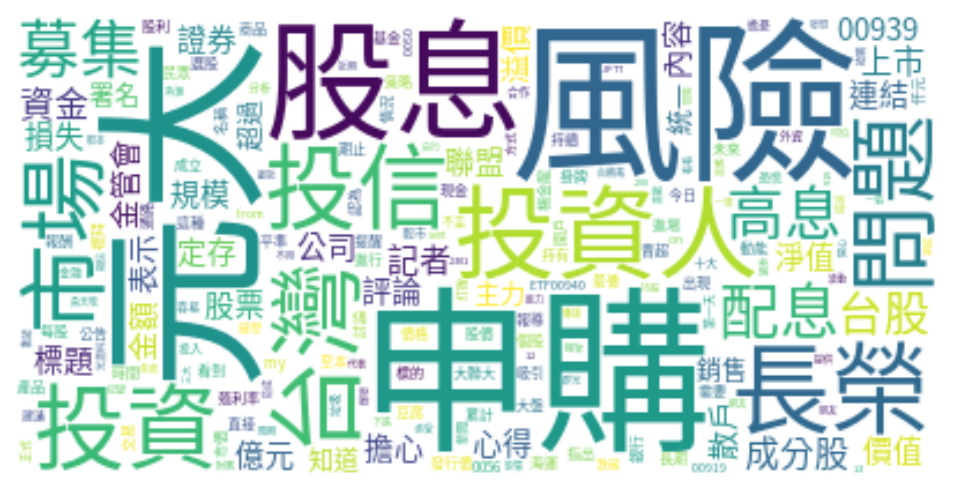

In [174]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

關鍵字出現了「問題」、「風險」等關鍵字

(-0.5, 399.5, 199.5, -0.5)

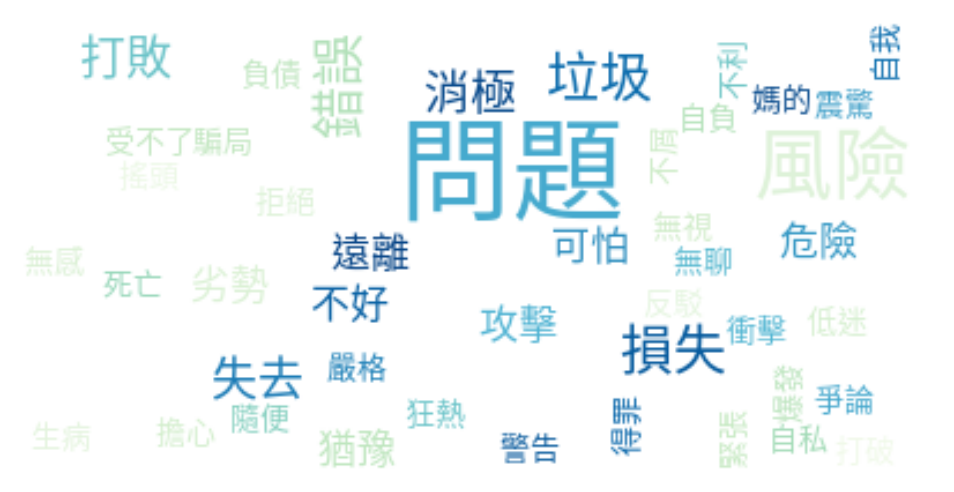

In [185]:
date = "2024-01-26"
end_date = "2024-03-23"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('問題')) & ( # 內文包含雞腿排
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

利用「遠離」去查看原文內容

In [188]:
date = "2024-01-26"
end_date = "2024-03-23"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('問題')) & (
    sent_df['sentence'].str.contains('遠離')) # 包含「缺點」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
4117,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,可以說這個金融遊戲,負向
4118,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,裡面有蟲,負向
4119,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,會吃掉你很多的利潤,負向
4120,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,總的來說,負向
4121,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,不要掉入投資心理謬誤的陷阱,負向
4122,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,遠離高配息ETF,負向
4123,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,對於年輕人與小資族,負向
4124,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,才有翻身的機會對於中產階級或中年朋友,負向
4125,https://www.ptt.cc/bbs/Stock/M.1710692181.A.26...,[心得]談談高息ETF,2024-03-18,突然發現真的很久沒PO文了，身為26年的台股資深投資人、PTT股板20年板主、\n\n創投前...,才能早日實現財富自由,負向
4126,https://www.ptt.cc/bbs/Stock/M.1710718029.A.75...,Re:[請益]00940現在如何停損？,2024-03-18,我試著回，但不知道正不正確，請各方高手指教\n建倉期要買到九成股票，要100%貼近申購說明書...,我試著回,正向


文章中提到了對00940的疑慮

# 第五週: 中文文集的情緒分析2

**Author:** 李培聖<br>
**Date created:** 2024/01/26<br>
**Last modified:** 2024/03/23<br>
本週課程為「情緒分析2」，與情緒分析1不同，這次會使用中研院提供的CKIP自然語言處理工具包，但其中不像coreNLP有提供情緒分析套件，所以在此介紹一款用於中文情緒分析的套件SnowNLP，是Courpus-base的情緒分析，不是使用情緒字典，而是使用預訓練的情緒分析模型或演算法，給與整個文章一個情緒分數。情緒分析2的步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中會介紹CKIP、分析方法、SnowNLP

## 大綱
1. 套件說明
2. CKIP 介紹
    + 2.1 安裝CKIP
    + 2.2 利用CKIP進行自然語言處理
3. CKIP 標註
    + 3.1 將抓取結果用CKIP進行處理
    + 3.2 探索分析 - NER
    + 3.3 探索分析 - POS
4. 利用SnowNLP進行情緒分析

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [ ]:
# 安裝會使用到的套件
# 安裝ckiptagger前要先安裝tensorflow，有套件相依的問題
# %pip install -U ckiptagger\[tf,gdown\]
# %pip install wordcloud SnowNLP

In [189]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       2.1.0
anyio                         3.7.1
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
astunparse                    1.6.3
attrs                         23.2.0
backcall                      0.2.0
backports.functools-lru-cache 2.0.0
beautifulsoup4                4.12.3
bleach                        6.1.0
cachetools                    5.3.3
certifi                       2024.2.2
cffi                          1.15.1
charset-normalizer            3.3.2
ckiptagger                    0.2.1
colorama                      0.4.6
comm                          0.2.2
cycler                        0.11.0
debugpy                       1.6.3
decorator                     5.1.1
defusedxml                    0.7.1
entrypoints                   0.4
exceptiongroup                1.2.0
fastjsonschema                2.19.1
filelock    

In [ ]:
# !pip install -U ckiptagger\[tf,gdown\]
# !pip install wordcloud SnowNLP

     ---------------------------------------- 0.0/37.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.6 MB ? eta -:--:--
     --------------------------------------- 0.0/37.6 MB 445.2 kB/s eta 0:01:25
     --------------------------------------- 0.0/37.6 MB 445.2 kB/s eta 0:01:25
     --------------------------------------- 0.1/37.6 MB 365.7 kB/s eta 0:01:43
     --------------------------------------- 0.1/37.6 MB 459.5 kB/s eta 0:01:22
     --------------------------------------- 0.1/37.6 MB 459.5 kB/s eta 0:01:22
     --------------------------------------- 0.1/37.6 MB 459.5 kB/s eta 0:01:22
     --------------------------------------- 0.1/37.6 MB 312.2 kB/s eta 0:02:01
     --------------------------------------- 0.1/37.6 MB 312.2 kB/s eta 0:02:01
     --------------------------------------- 0.1/37.6 MB 312.2 kB/s eta 0:02:01
     --------------------------------------- 0.1/37.6 MB 312.2 kB/s eta 0:02:01
     --------------------------------------- 0.2/37.6 MB

In [ ]:
# 確認當前工作目錄
# %pwd

In [190]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import os

c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\tensorflow\python\framework

如果有重新裝package，記得需要restart kernel 才會使用更新後的套件

## 2. CKIP 介紹
- 是中研院詞庫小組開發的中文自然語言處理套件，其斷詞效果比起`jieba`效果更好，並且提供性命名實體辨識、詞性標註、句法分析
- github: https://github.com/ckiplab/ckiptagger

### 2.1 CKIP安裝

In [191]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=da94180b-25ca-4871-89a3-a8f8e7da8df7
To: c:\Users\USER\Desktop\final_scribble\group\data.zip
100%|██████████| 1.88G/1.88G [00:43<00:00, 43.0MB/s]


### 2.2 利用CKIP進行自然語言處理
透過ckip這個套件可以對文集進行斷詞、命名實體辨識、詞性標記等處理
+ CKIP 標註任務
    + 斷詞（ws）
        + 可以設定自己的辭典
            + `recommend_dictionary` 推薦字典
            + `coerce_dictionary` 強制字典
    + 實體辨識（ner）
    + 詞性標註（pos）
+ NER與POS名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [192]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")
# ws = WS("./data", disable_cuda=False)
# pos = POS("./data", disable_cuda=False)
# ner = NER("./data", disable_cuda=False)

## 3. CKIP 標註

### 3.1 將抓取結果用CKIP進行處理
- 資料來源: 工作流程蒐集PTT 股票版 Food 2024-01-26 ~ 2024-03-23 所有文章

我們已經介紹過CKIP的使用方式，現在來對PTT的資料使用CKIP進行自然語言處理

In [193]:
## 讀取文章
df = pd.read_csv("./00940.csv")
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26 19:53:36,MikeShiver,Stock,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""abc0922001"",...",180.217.136.24,2024-01-27 02:04:03,ptt
1,2,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,[新聞]元大加入月配息ETF戰場！00940發行價10,2024-01-27 11:40:33,kiversonx17,Stock,原文標題：\n\n元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""SuGK"", ""cmtC...",118.165.210.174,2024-01-28 02:04:10,ptt
2,3,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,[請益]00940的選股邏輯,2024-02-18 17:39:12,humbler,Stock,元大新募集的高股息ETF 00940，\n除了發行價10元驚人低之外，\n選股邏輯納入本益比...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""apeople"", ""c...",111.251.198.167,2024-02-19 02:05:29,ptt


定義文字清理的相關function

In [194]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

CKIP 處理相關function

In [199]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[]


In [200]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

# def get_nlp_result(data_df):
#     start = time.time()

#     pos_list = []
#     entity_list = []
#     sentence_list = []
    
#     # 遍歷 dataframe 的每筆資料
#     for index, row in data_df.iterrows(): # document level    
#     # print(f"\ndocument {index}") 

#         # 資料清理 ＆ 斷句
#         tmp = Sentence_Segmentation(row['artContent']) 
#         flat_list = [item for sublist in tmp for item in sublist]

#         # ckip
#         word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
#         pos_sentence_list = pos(word_sentence_list)
#         entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

#         # 遍歷該 document 中的每一個句子
#         for i, sentence in enumerate(flat_list):
#             # print(f"sentence {i}: {sentence}")
#             sentence_list.append([row['system_id'], sentence])            
#             temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
#             temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

#             pos_list.append(temp_tokens)
#             if len(temp_entites) != 0:
#                 entity_list.append(temp_entites)
            
#     pos_flat = [item for sublist in pos_list for item in sublist]
#     entity_flat = [item for sublist in entity_list for item in sublist]

#     pos_table = pd.DataFrame(data=pos_flat, 
#                     columns=['system_id','word','pos'])        
    
#     entity_table = pd.DataFrame(data=entity_flat, 
#                         columns=['system_id','word','ner']) 

#     sentence_table = pd.DataFrame(data=sentence_list, 
#                     columns=['system_id','sentence']) 

#     end = time.time()
#     print("time costing: {}".format(end - start))

#     return pos_table, entity_table, sentence_table
from tqdm import tqdm

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # Get the total number of rows in the DataFrame
    total_rows = len(data_df)
    
    # Use tqdm to create a progress bar for the loop
    for index, row in tqdm(data_df.iterrows(), total=total_rows, desc="Processing rows"):
        # Document level processing
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        word_sentence_list = ws(flat_list, coerce_dictionary=dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # Sentence level processing
        for i, sentence in enumerate(flat_list):
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entities = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entities) != 0:
                entity_list.append(temp_entities)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table


In [201]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['原文標題元大'], ['臺灣價值'], ['高息准募展開募集'], ['原文連結'], ['///']]
['原文標題元大', '臺灣價值', '高息准募展開募集', '原文連結', '///']


In [202]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

Processing rows: 100%|██████████| 241/241 [03:13<00:00,  1.25it/s]

time costing: 193.122704744339


+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [203]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,原文,Na
1,1,標題元,Na
2,1,大,VH
3,1,臺灣,Nc
4,1,價值,Na


In [204]:
entity_table.head() # word entity 列表

,system_id,word,ner
0,1,臺灣,NORP
1,1,工商時報,WORK_OF_ART
2,1,陳昱光,PERSON
3,1,元大投信日,ORG
4,1,證交所,ORG


In [205]:
sentence_table.head()

,system_id,sentence
0,1,原文標題元大
1,1,臺灣價值
2,1,高息准募展開募集
3,1,原文連結
4,1,///


In [206]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 241
posts have NER: 227


In [208]:
# 將文章存成csv
pos_table.to_csv('raw_data/pos_00940.csv', index = False)
entity_table.to_csv('raw_data/entity_00940.csv', index = False)
sentence_table.to_csv('raw_data/sentence_00940.csv', index = False)

### 3.2 探索分析 - NER

將剛才分析的資料匯入

In [209]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv('raw_data/pos_00940.csv') 
entity_table = pd.read_csv('raw_data/entity_00940.csv') 
sentence_table = pd.read_csv('raw_data/sentence_00940.csv') 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [210]:
entity_table['ner'].unique()

array(['NORP', 'WORK_OF_ART', 'PERSON', 'ORG', 'DATE', 'GPE', 'CARDINAL',
       'LOC', 'ORDINAL', 'MONEY', 'TIME', 'FAC', 'PERCENT', 'LAW',
       'PRODUCT', 'EVENT', 'LANGUAGE', 'QUANTITY'], dtype=object)

In [211]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

,ner,count
11,ORG,1125
1,DATE,767
0,CARDINAL,417
13,PERSON,397
4,GPE,309
8,MONEY,204
9,NORP,88
16,TIME,55
10,ORDINAL,52
7,LOC,27


c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


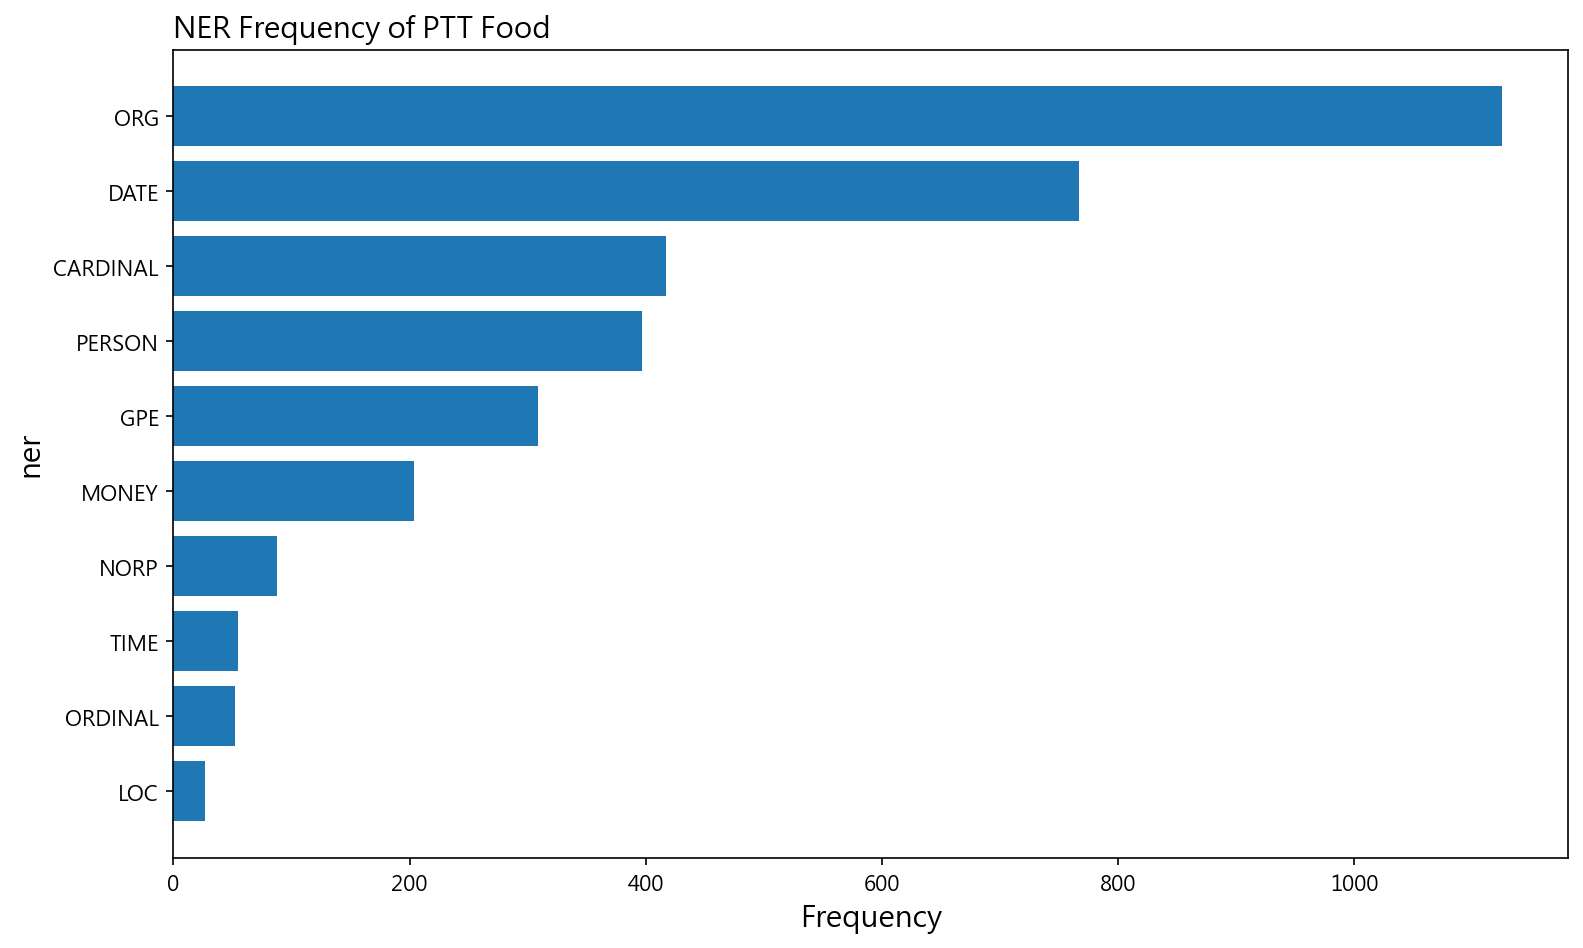

In [212]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Food',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


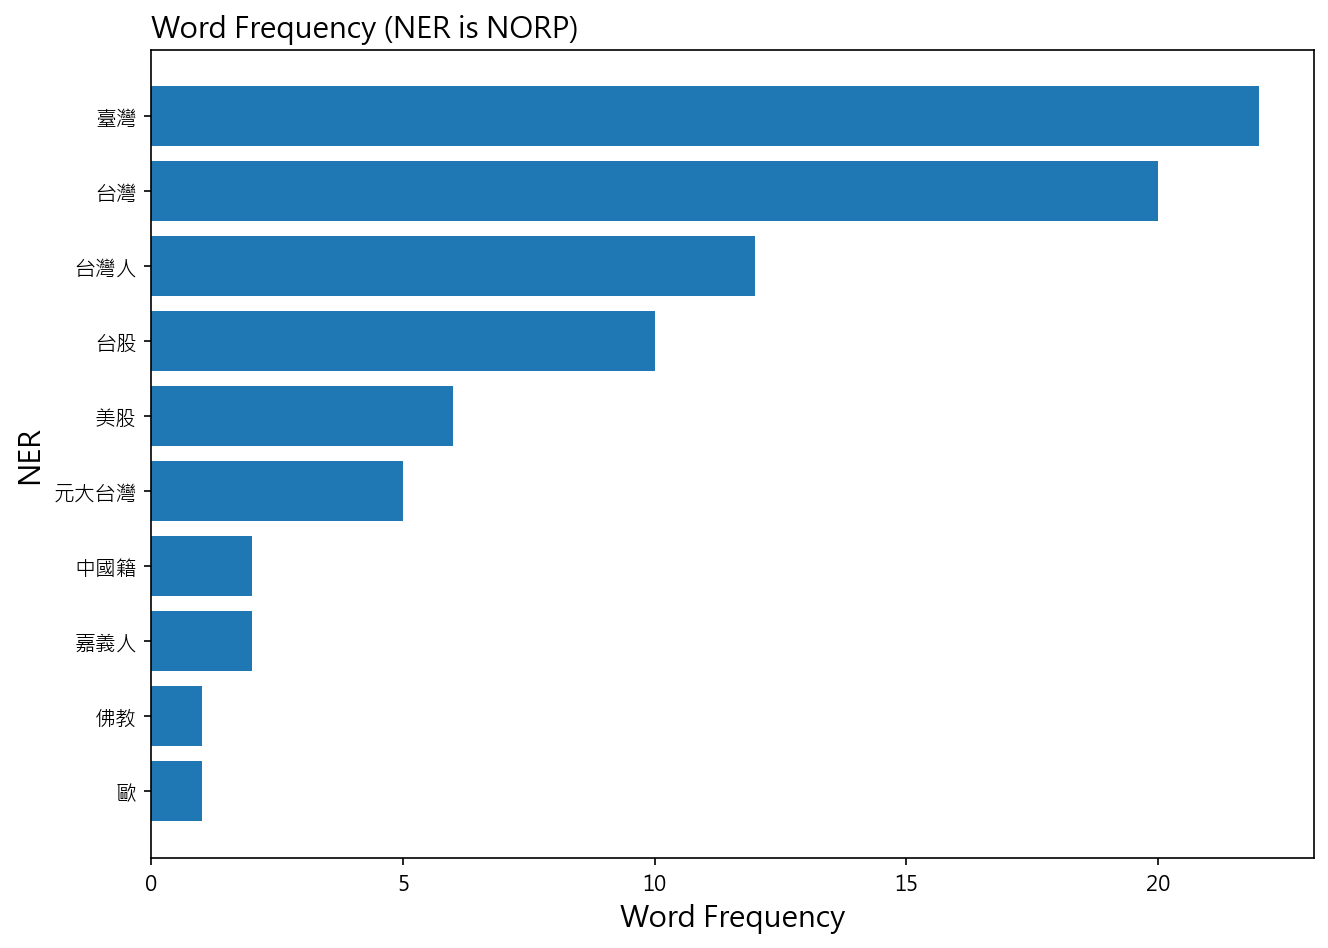

In [213]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的組織(ORG)

c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


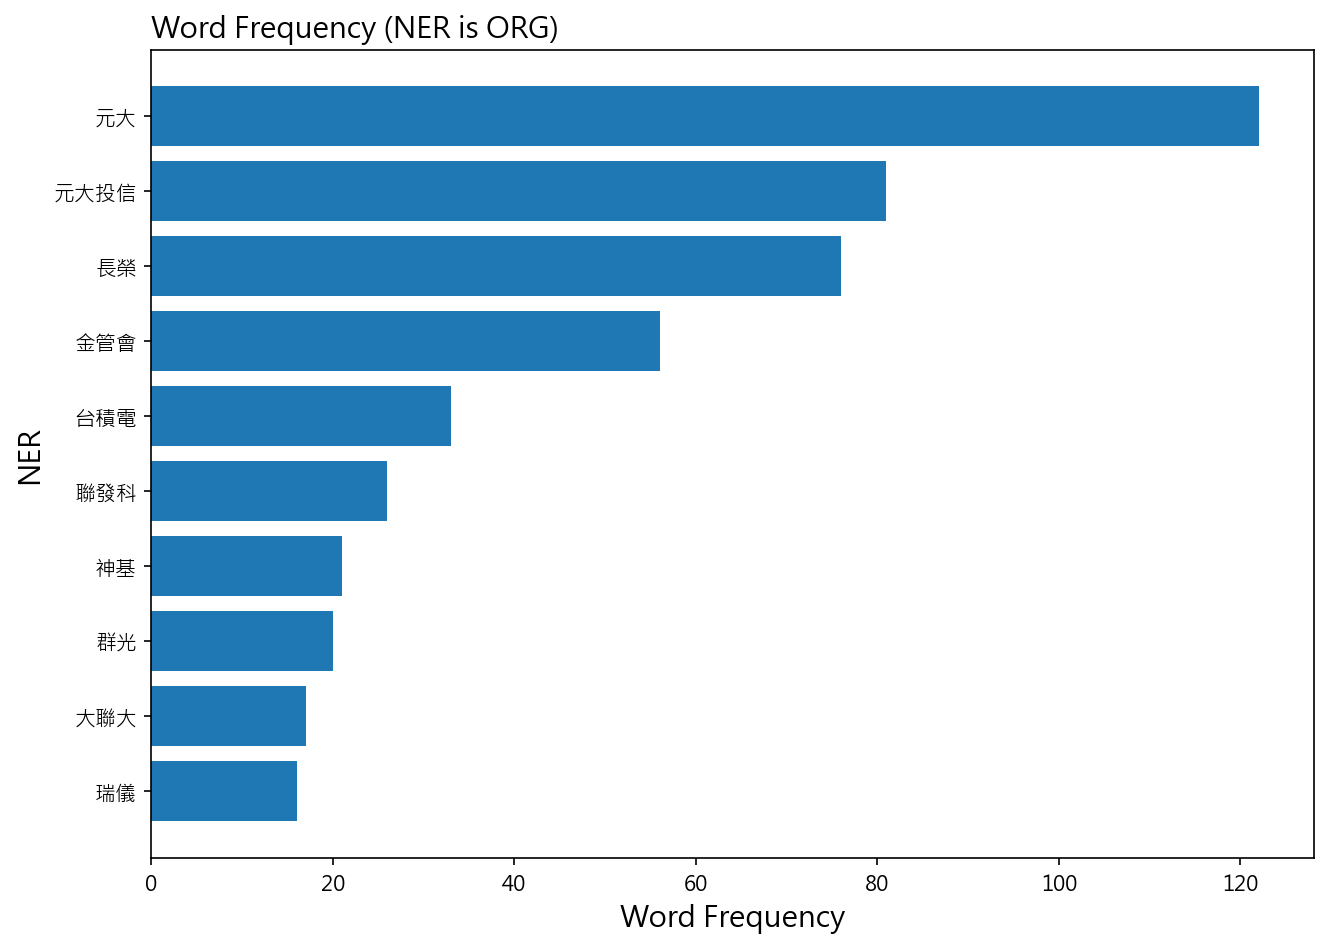

In [214]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的人名(PERSON)

c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


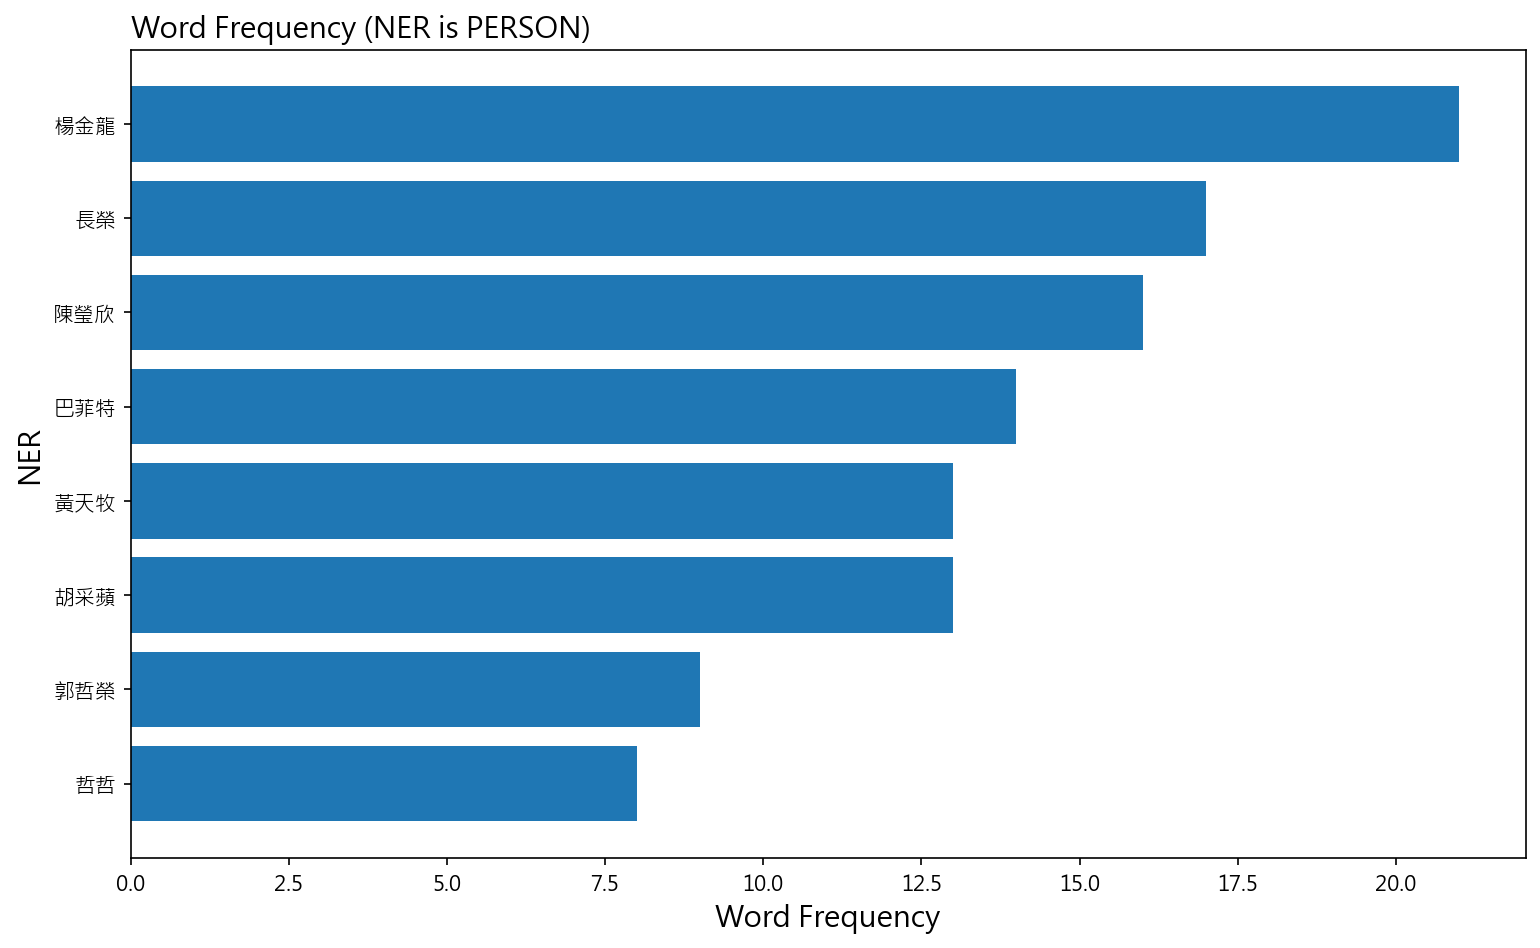

In [215]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

下面找出「元大」相關文章，與後續情緒分析一起做探索

In [265]:
keyword_list = ['元大']
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

元大：97篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Stock/M.1706270018.A.53...,[新聞]元大臺灣價值高息ETF准募3／11展開募集,2024-01-26 19:53:36,MikeShiver,Stock,原文標題：元大\n臺灣價值\n高息ETF准募 3／11展開募集\n\n原文連結：\nhttp...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""abc0922001"",...",180.217.136.24,2024-01-27 02:04:03,ptt
1,2,https://www.ptt.cc/bbs/Stock/M.1706326839.A.D0...,[新聞]元大加入月配息ETF戰場！00940發行價10,2024-01-27 11:40:33,kiversonx17,Stock,原文標題：\n\n元大加入月配息ETF戰場！00940發行價10元、有收益平準金、3月11號...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""SuGK"", ""cmtC...",118.165.210.174,2024-01-28 02:04:10,ptt
2,3,https://www.ptt.cc/bbs/Stock/M.1708249155.A.1C...,[請益]00940的選股邏輯,2024-02-18 17:39:12,humbler,Stock,元大新募集的高股息ETF 00940，\n除了發行價10元驚人低之外，\n選股邏輯納入本益比...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""apeople"", ""c...",111.251.198.167,2024-02-19 02:05:29,ptt


### 3.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [266]:
pos_table['pos'].unique()

array(['Na', 'VH', 'Nc', 'VE', 'VC', 'FW', 'Nb', 'Nd', 'VK', 'A',
       'COMMACATEGORY', 'D', 'P', 'VJ', 'Caa', 'Nes', 'Nf', 'VHC', 'DE',
       'Neqa', 'Neu', 'SHI', 'VG', 'Ng', 'VCL', 'VA', 'Ncd', 'Cbb', 'VB',
       'Dfa', 'Cab', 'V_2', 'VL', 'VD', 'Nv', 'Nh', 'T', 'VI', 'VF', 'Di',
       'VAC', 'Da', 'Nep', 'Neqb', 'Dk', 'Cba', 'I', 'DM', 'Dfb',
       'PARENTHESISCATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [267]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
15,Na,11332
5,D,5610
35,VC,4438
41,VH,3211
6,DE,1804
29,P,1795
16,Nb,1644
25,Nf,1441
38,VE,1439
17,Nc,1321


#### POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


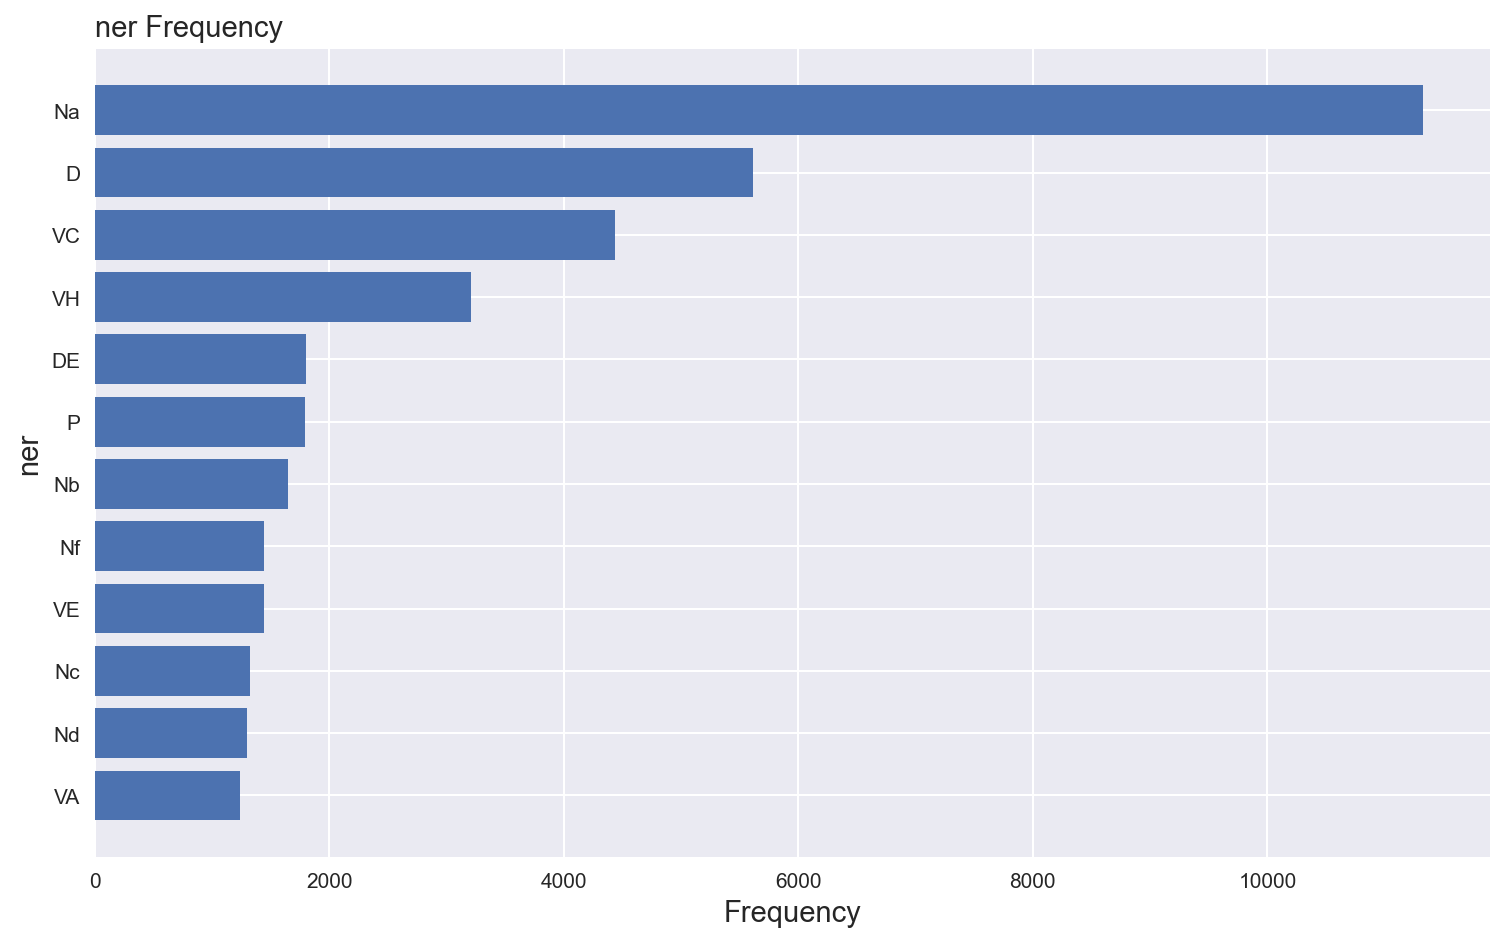

In [268]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的名詞(Noun)


In [269]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
24,元大,276
364,長榮,159
287,聯發科,39
125,張,36
55,台積電,35
279,群光,34
253,神基,31
79,國泰,30
244,瑞儀,26
290,聯電,24


c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == "":


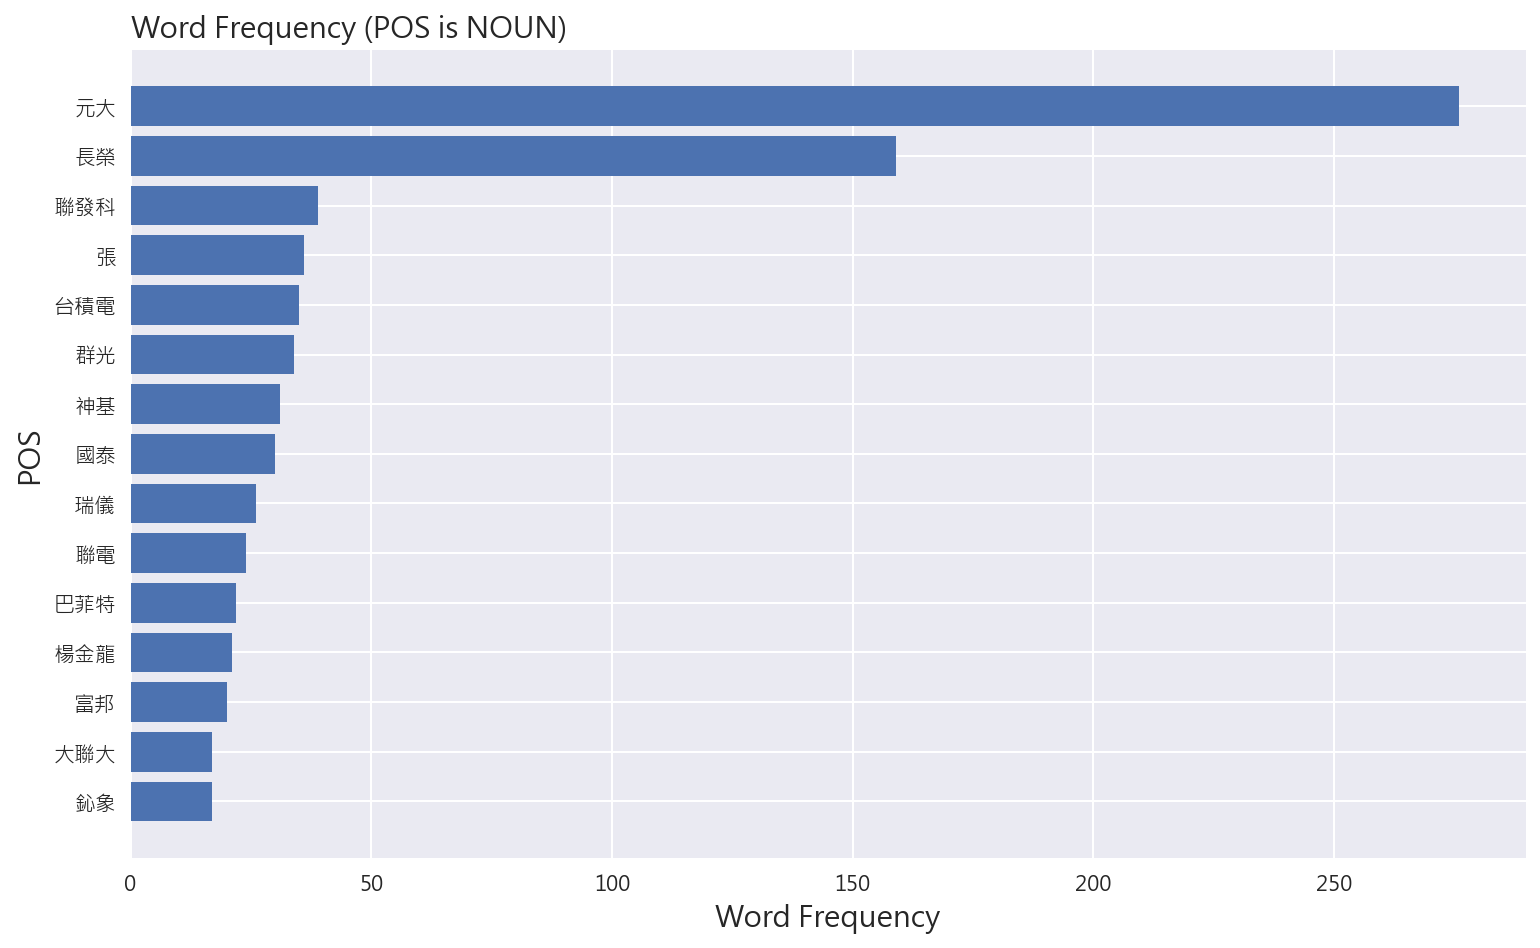

In [270]:
# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到「元大」和「長榮」有較高的討論度。

### 涉及到的動詞(VERB)
+ 我們可以找出談論吃到飽時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [271]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
424,申購,218
226,投資,173
87,募集,169
438,發布,75
674,連結,71
518,署名,67
443,發行,56
621,買進,46
58,分析,37
607,買到,32


c:\Users\USER\miniconda3\envs\SMA\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


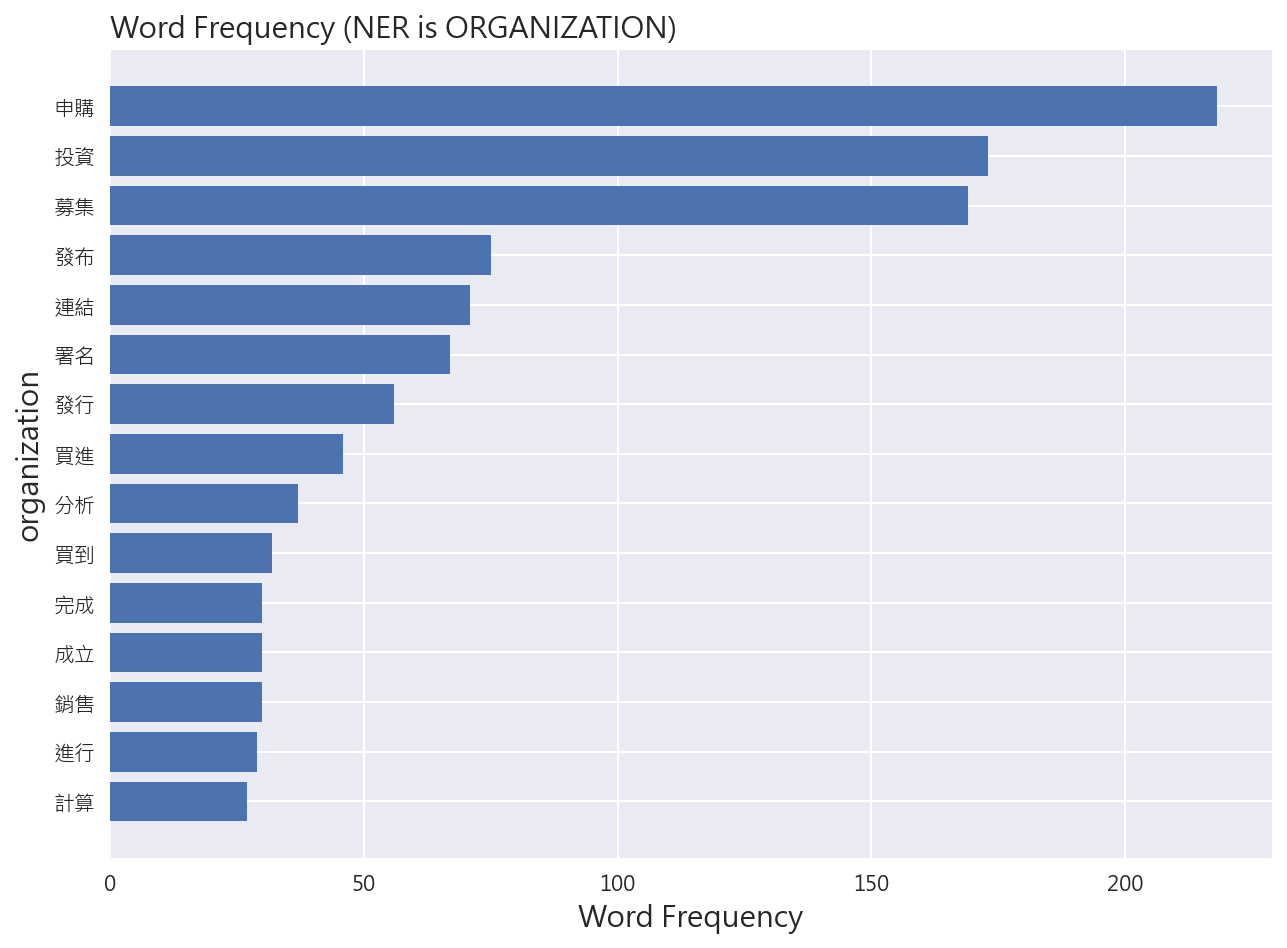

In [272]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORGANIZATION)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

發現在貼文中的動詞，「申購」、「投資」佔了相當高的頻率，，可推測民眾對其有較高的重視程度。

## 4. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [273]:
from snownlp import SnowNLP
s = SnowNLP('這部電影很讚')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.786074481210413

使用先前NER得到的「元大」相關文章，看看旭集相關文章的情緒表現。<br>
首先將句子和日期合併，方便之後做分析

In [274]:
sentence_table = pd.read_csv('raw_data/sentence_00940.csv') #匯資料

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource
0,1,原文標題元大,2024-01-26 19:53:36,ptt
1,1,臺灣價值,2024-01-26 19:53:36,ptt
2,1,高息准募展開募集,2024-01-26 19:53:36,ptt


In [275]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource,sentimentValue
0,1,原文標題元大,2024-01-26 19:53:36,ptt,0.034526
1,1,臺灣價值,2024-01-26 19:53:36,ptt,0.063271
2,1,高息准募展開募集,2024-01-26 19:53:36,ptt,0.939847


In [276]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    3.299000e+03
mean     3.753337e-01
std      3.105788e-01
min      5.750955e-14
25%      7.847894e-02
50%      3.027071e-01
75%      6.148531e-01
max      9.999966e-01
Name: sentimentValue, dtype: float64

<AxesSubplot:>

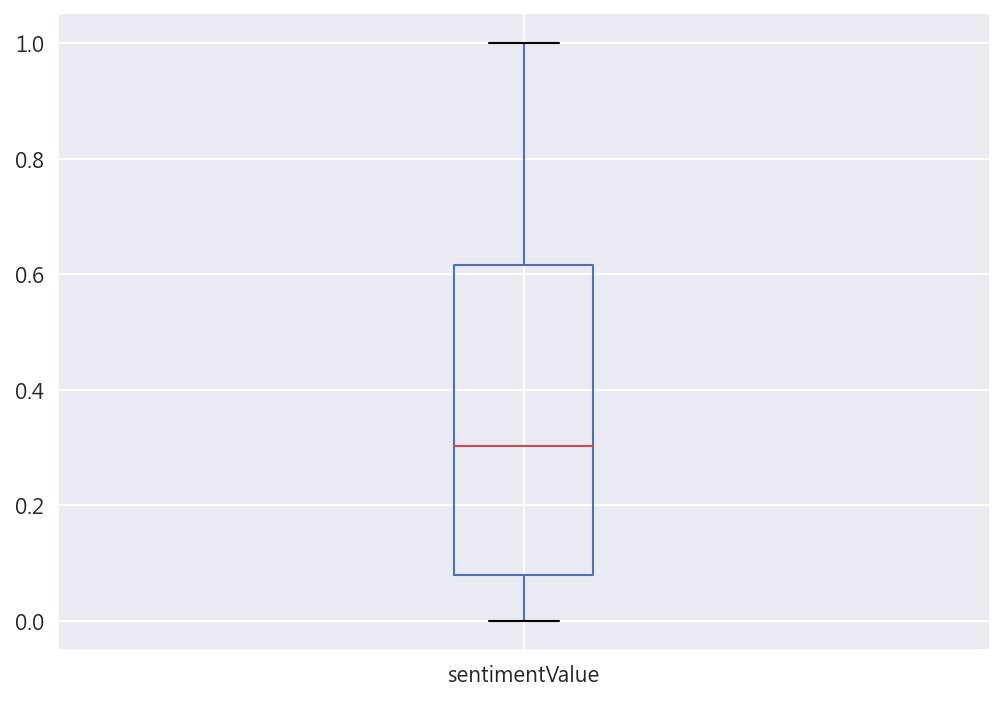

In [277]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [278]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

,artDate,sentimentValue
0,2024-01,0.249819
1,2024-02,0.310055
2,2024-03,0.378830


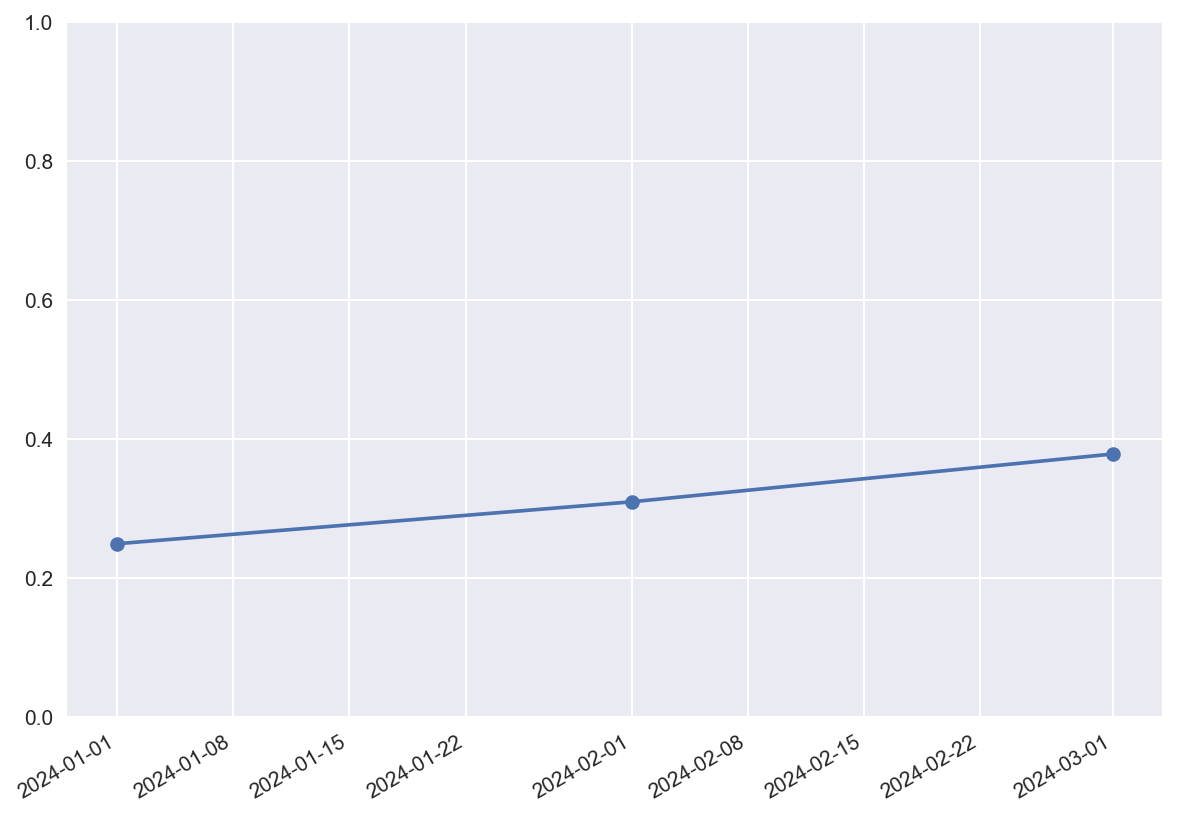

In [279]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

我們挑出 2024年03月 來分析。

### 詞彙探索
從上圖中可以發現 2024年03月 的情緒分數相對高，我們把這個月的正面句子挑出來看看他們都用甚麼詞。

In [287]:
# 篩時間
filter_sentiment = sent_date[sent_date['artDate']=='2024-03']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head()

,system_id,sentence,artDate,dataSource,sentimentValue
313,13,國內市場快速蓬勃，年吸金逾兆元，年增率高達，逼得金管會再度出手，,2024-03,ptt,0.733279
335,13,此外，財經部落客碎念女子日前曾公開點名檔平準金占比極高，包括復,2024-03,ptt,0.969954
344,13,國內崛起，近期也窩蜂跟買，金管會要出來管事了嗎,2024-03,ptt,0.733112
377,17,募百億不夠看這檔,2024-03,ptt,0.982832
396,17,你們家有幫募集申購嗎,2024-03,ptt,0.923366


In [288]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()

,system_id,sentimentValue,word
0,13,0.733279,原文
1,13,0.733279,標題
2,13,0.733279,台股
3,13,0.733279,高息
4,13,0.733279,成


In [291]:
# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [292]:
# 自定停用字
with open('dict/stopwords.txt') as f:
    stop_words = f.read().splitlines()

print(stop_words)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '為', '為了', '為什麼', '為何', '為止', '為此', '為著', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以為', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何', '任憑', '似的', '但', '但凡', '但是', '何', '何以', '何況', '何處', '何時', '余外', '作為', '你', '你們', '使', '使得', '例如', '依', '依據', '依照', '便於', '俺', '俺們', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '儻然', '像', '兒', '先不先', '光是', '全體', '全部', '

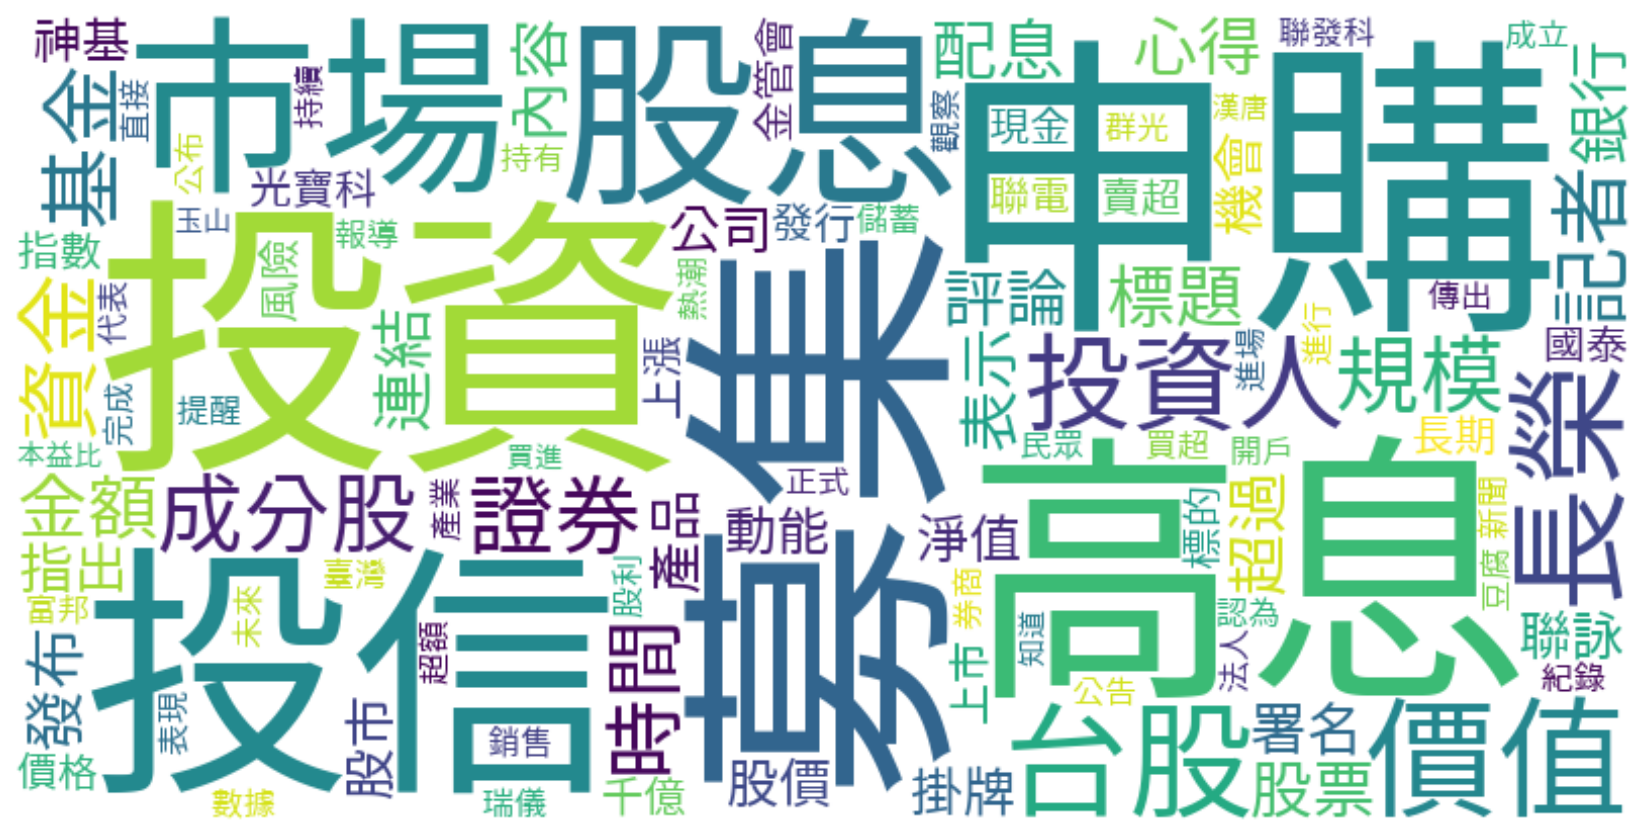

In [293]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(("00940", "ETF", "940", "現在", "今天", "原文", "10", "15", "今年", "一下", "目前", "問題",'台灣', "元大",'今日'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()